2022-01-25 <br/>
Board games <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-25/readme.md

Line plot with bounding margin - Completed

https://plotly.com/python/continuous-error-bars/

In [303]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
pio.renderers.default='jupyterlab'
import os

In [304]:
df_rating = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/ratings.csv')

In [305]:
# Read only specific columns 
col_list = ["id",  'playingtime', 'minplaytime', 'maxplaytime']
df_details = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/details.csv', usecols=col_list)

In [306]:
df = df_rating.merge (df_details, on ='id')

In [307]:
df.shape

(21631, 13)

In [308]:
df.head()

,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail,playingtime,minplaytime,maxplaytime
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,45,45,45
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,45,30,45
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,120,60,120
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,30,30,30
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,30,30,30


In [309]:
df_reduced = df[['name','playingtime','minplaytime','maxplaytime','average']]

In [310]:
df_reduced.head()

,name,playingtime,minplaytime,maxplaytime,average
0,Pandemic,45,45,45,7.59
1,Carcassonne,45,30,45,7.42
2,Catan,120,60,120,7.14
3,7 Wonders,30,30,30,7.74
4,Dominion,30,30,30,7.61


In [311]:
df_reduced[df_reduced.playingtime>100].shape

(4182, 5)

In [312]:
# Filtering out the fluff
df_reduced=df_reduced[df_reduced.playingtime <100]

In [313]:
# Rounding to the nearest 0.5 

df_reduced['average'] = df_reduced.average.mul(2).round().div(2)

In [314]:
df_avg = df_reduced.groupby(['average'])[['playingtime','minplaytime','maxplaytime']].mean().reset_index()

In [319]:
x = df_avg['average']
y = df_avg['playingtime']
y_upper = [(y + np.std(df_avg['playingtime'])) ][0]
y_lower = [(y - np.std(df_avg['playingtime'])) ][0]
y_std = np.std(df_avg['playingtime'])

fig = go.Figure([
    go.Scatter(
        name='Average Playing time',
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
        
    ),
    go.Scatter(
        x=x, # x, then x reversed
        y=y +y_std, # upper, then lower reversed
      #  fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),
    go.Scatter(
        x=x, # x, then x reversed
        y=y- y_std, # upper, then lower reversed
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )    
])

fig.update_layout(
    title = 'Is it fun to play the long game?', 
    xaxis_range=[0,10],
    yaxis_title='Average time (h)',
    xaxis_title='Rating'

)
fig.show()

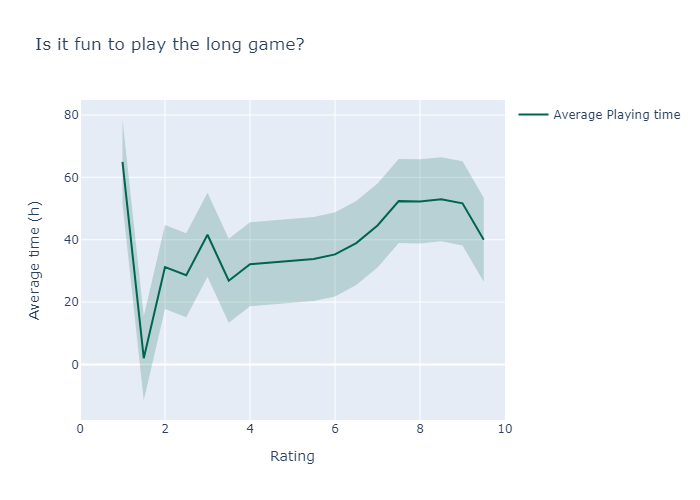

In [316]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)